# 결정 트리

머신러닝에서 중요한 앙상블 모델?을 만들기에 매우 중요함...

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hg-mldl2/blob/main/05-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


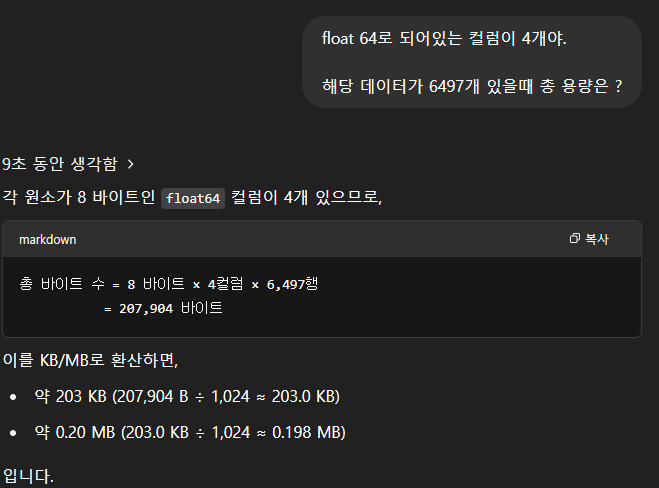

In [10]:
#6497개의 데이터가 있음..
# not null이(누락되지 않은 값) 6497개.

# 메모리에서 사용량은 데이터의 크기임.
# 누락된 값이 있다면 잘 생각하고, 기억하여 테스트 데이터에도 적용을 시켜야함.

# 만약 평균을 이용하여, 누락된 값에 적용을 한다면??
# -> 누락된 값을 제외한 값들의 평균을 적용 시킨다..
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
# 간단한 통계치를 보여줌.

wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [12]:

data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [19]:
#넘파이 배열로 바꾸고.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [16]:
# 학습 : 5197개 / 테스트 1300개

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [18]:
# 로지스틱 회귀를 이용했을 경우 -> 과소적합.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

설명하기 쉬운 (플로우차트) 를 만들어보자..

In [20]:
# 계수와 절편ㅇ로 이해가 가능한가 ? 아니다.. 쉽게 설명을 해보자.
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 결정 트리

In [21]:
# 출력 결과를 동일하게 하기 위하여 랜덤으로 섞는다 (42)
# 실전에선 안써도 됨.

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


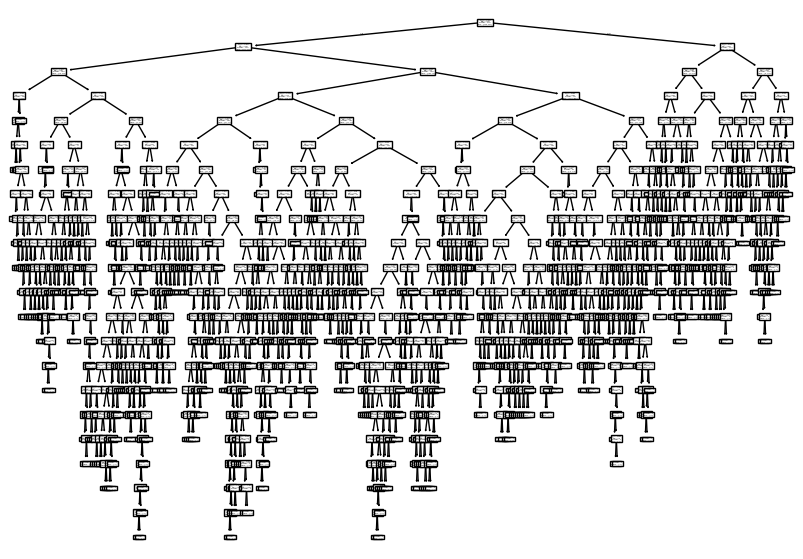

In [22]:
# 트리를 시각화 하여 보여주세요. (오래걸림..)
# 결정 트리라서 이진트리로 사용되어 표출됨.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

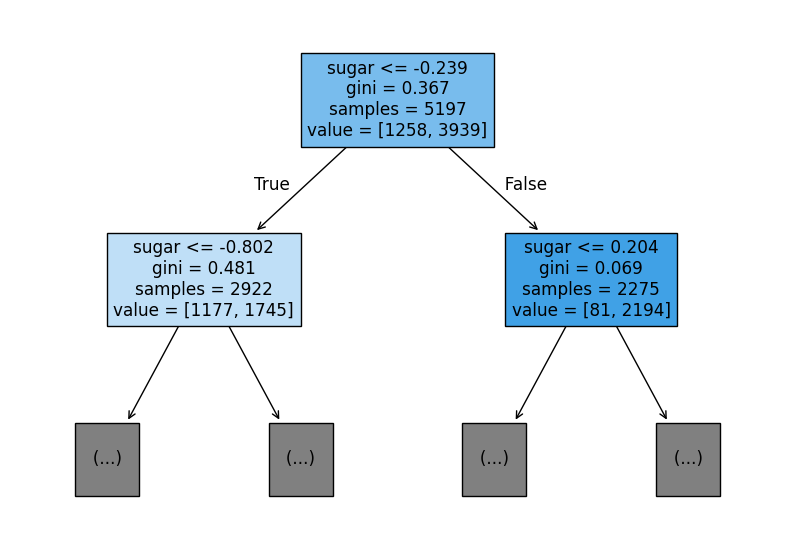

In [24]:
# max_depth 을 사용하여, 깊이를 1로 주어 간단히 보자.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
# sugar : 조건
# gini : 불순도 (자식과 부모의 불순도가 최소가 되도록 분할을 한다.)
# 양성만 모이거나 음성만 모이도록 하는 것... (true 와 false 갯수가 커야)
# 음성 클래스가 많으면 붉은색,, 양성 클래스가 많으면 푸른색으로 나타내어 시각화함.
# samples : 5197개가 있는데
# value : true : 1258 / false : 39.9

지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)


부모와 자식 간의 불순도 차이가 크다 == 순도가 높다. (잘되고있다)

### 가지치기

In [25]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


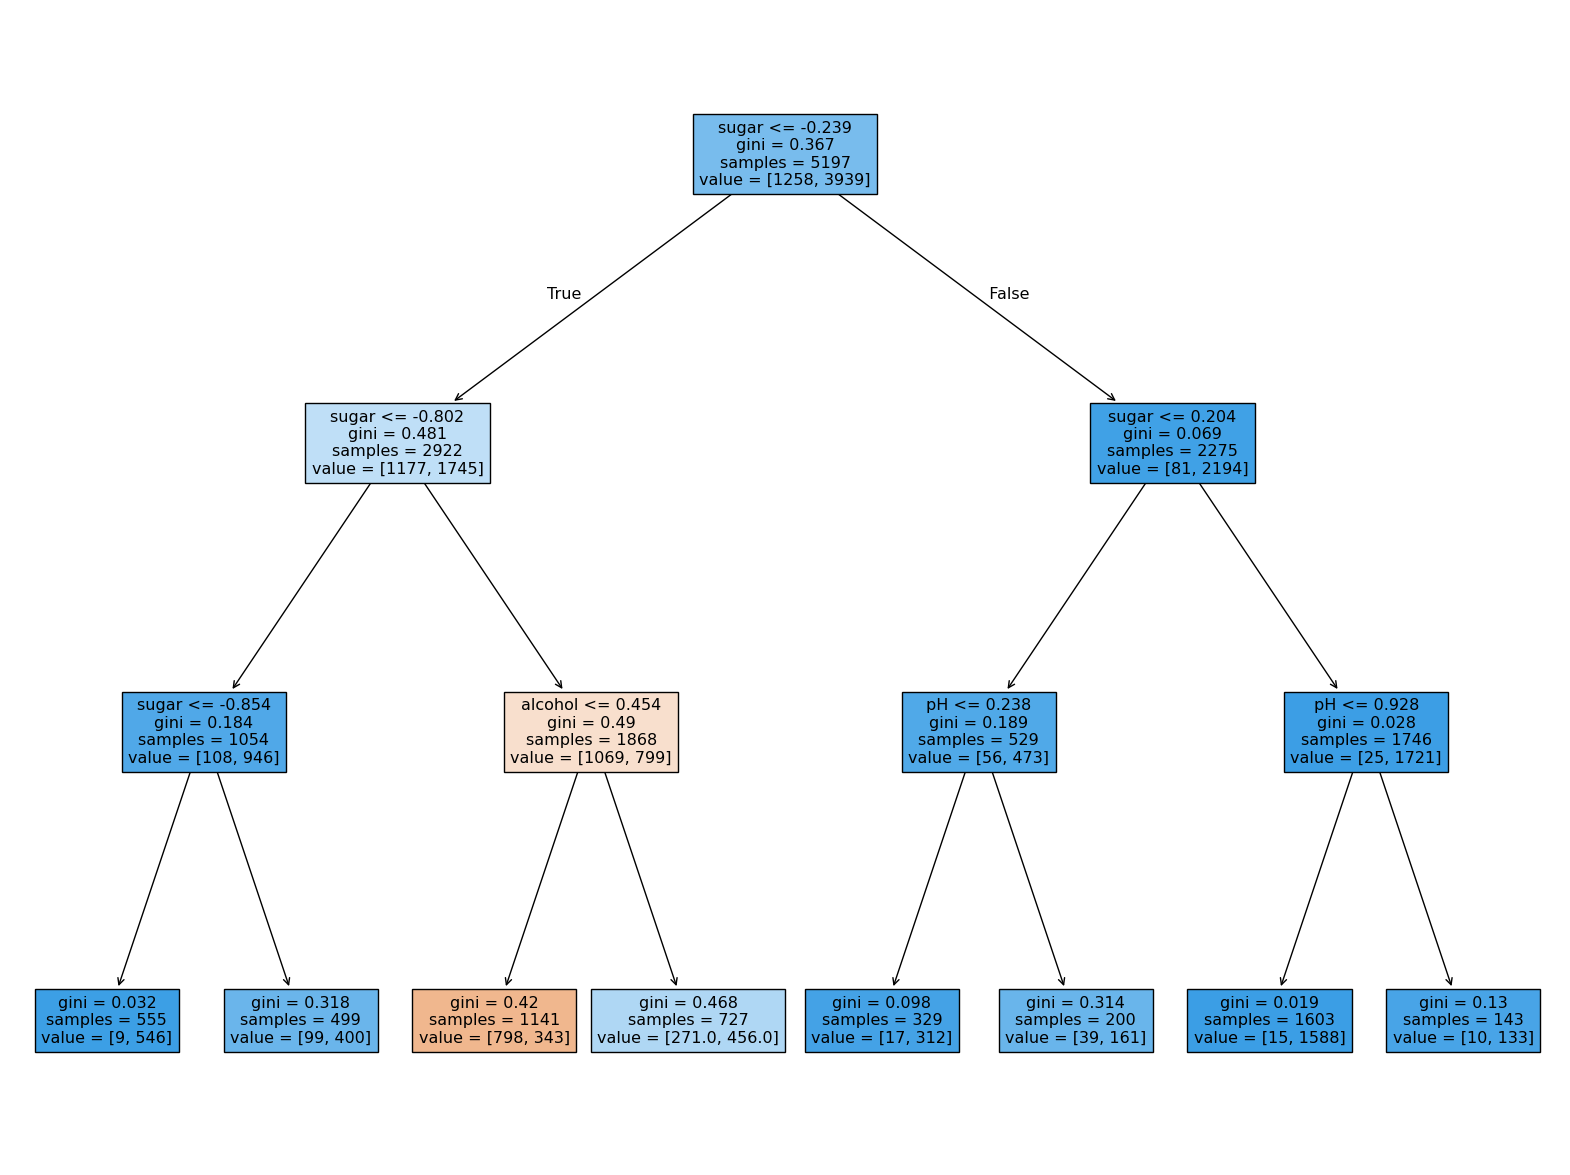

In [26]:
# 깊이가 3인 트리 구조
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# sugar 의 값이 음수? 뭔가 이상함 전처리 없애고 하기.
# 하나의 특성만 사용함.. 특성들 사이의 값을 조정할 필요가 없고, 원본 값만 사용 할 수 있다.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

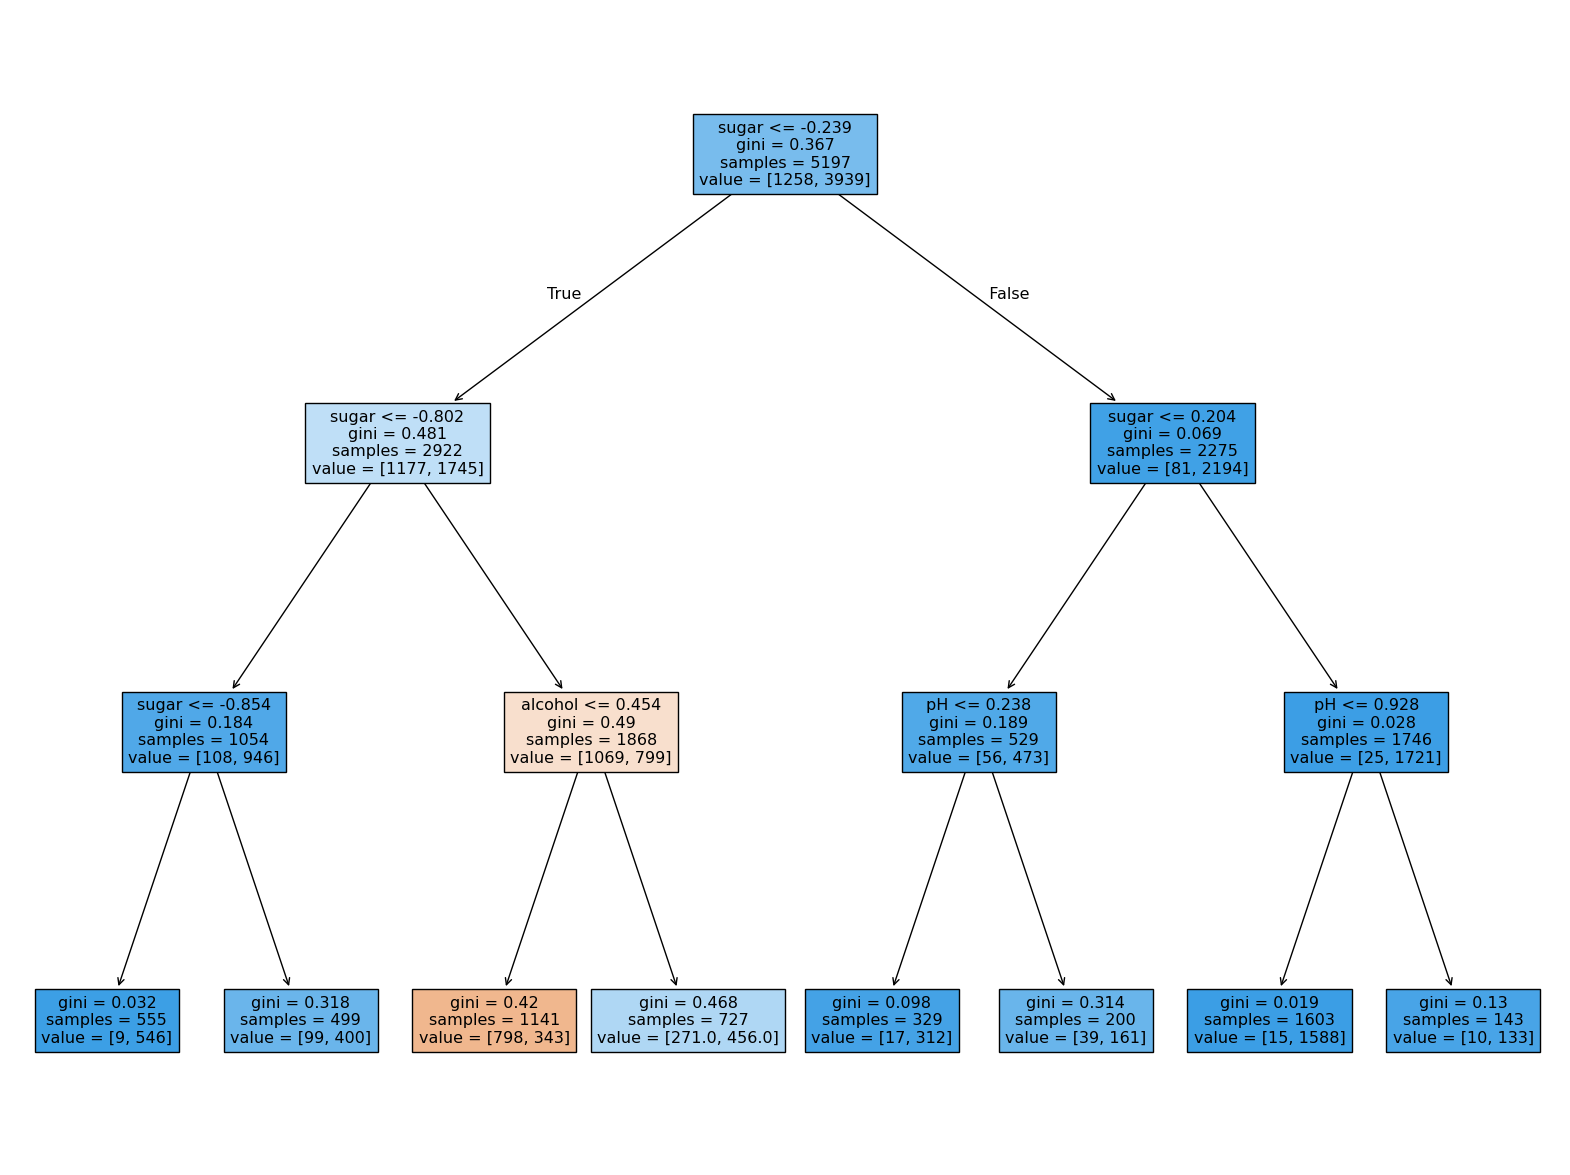

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
print(dt.feature_importances_)
# 특성 중요도.
# 총합이 1 임. 비율로 볼수있다.

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [31]:
# 최소 불순도가 0.0005
# 그래프를 보면 맨 오른쪽 아래가 다름을 볼 수 있음.
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, max_depth=3,random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


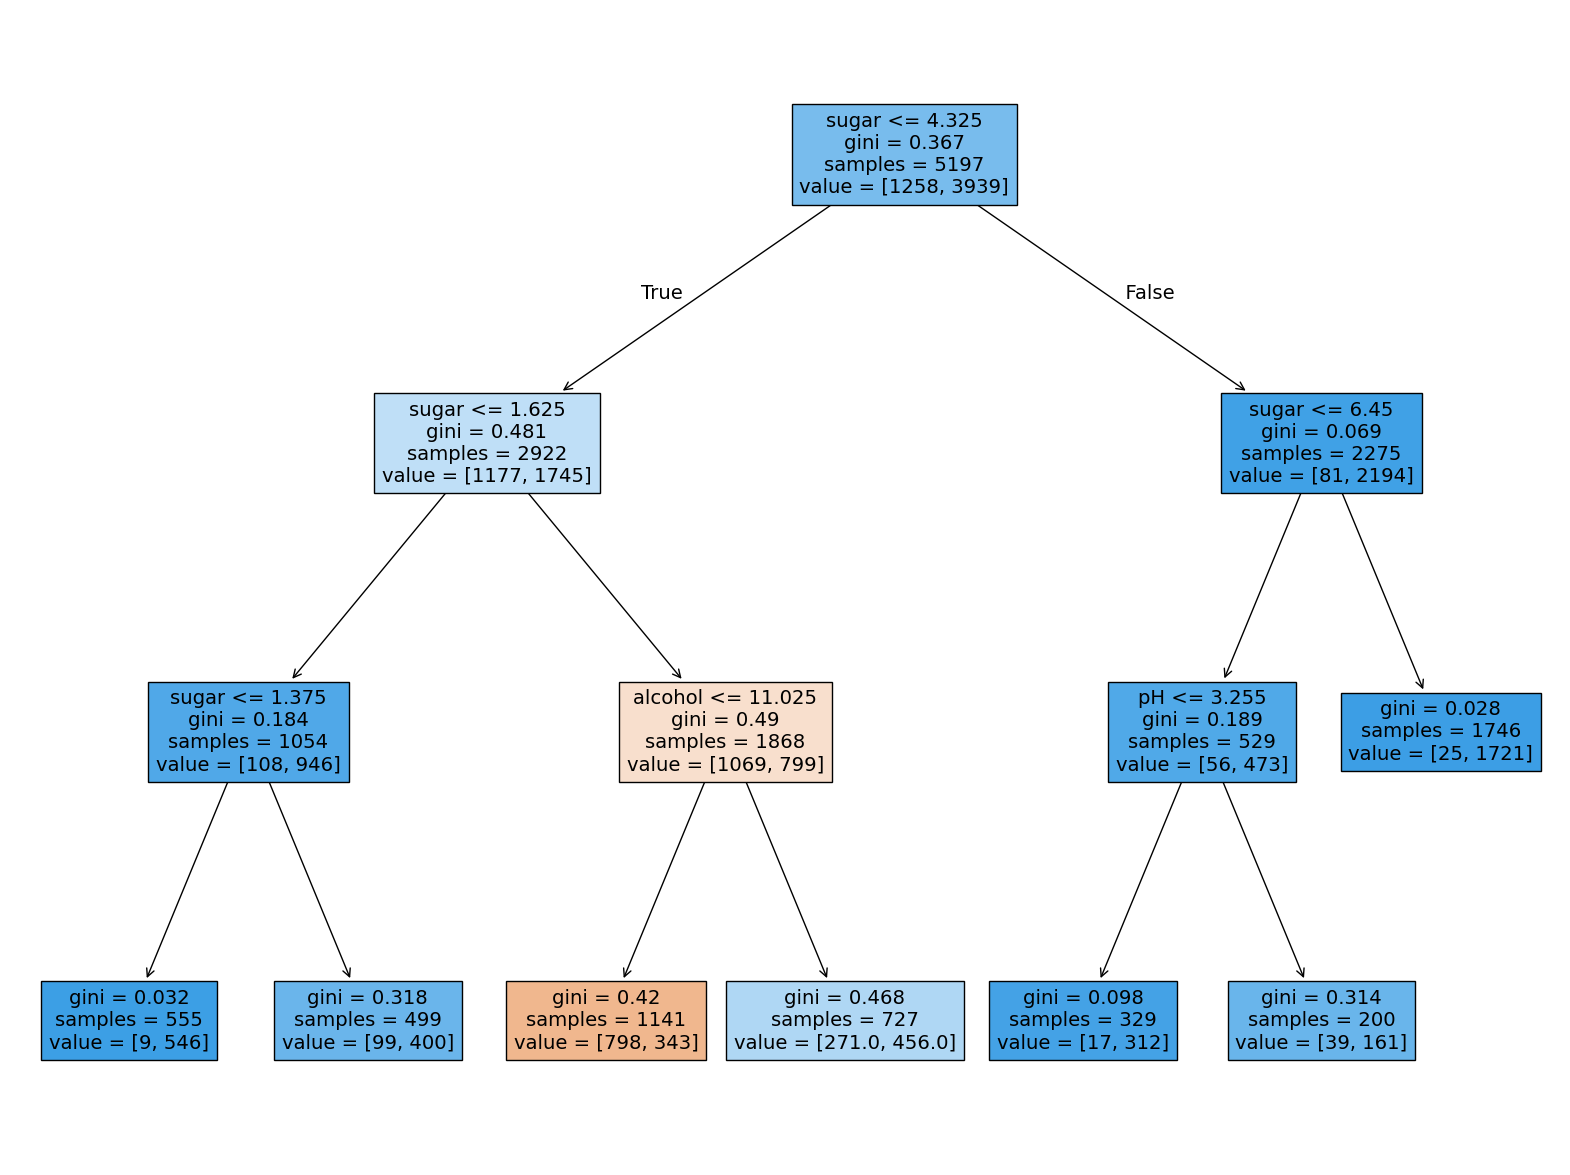

In [32]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()